In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import datetime
import copy
import time

import sys
sys.path.append('../../')

from data.processing import get_data

import models

from main.seir.fitting import single_fitting_cycle
from main.seir.forecast import get_forecast, forecast_all_trials, create_all_trials_csv, create_decile_csv_new
from main.seir.sensitivity import calculate_sensitivity_and_plot
from utils.generic.create_report import save_dict_and_create_report
from utils.generic.config import read_config
from utils.generic.enums import Columns
from utils.fitting.loss import Loss_Calculator
from utils.generic.logging import log_wandb
from viz import plot_forecast, plot_top_k_trials, plot_ptiles

import yaml

Failed to query for notebook name, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable
wandb: Currently logged in as: wadhwani (use `wandb login --relogin` to force relogin)
wandb: wandb version 0.10.5 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade
wandb: Tracking run with wandb version 0.10.0
wandb: Run data is saved locally in wandb/run-20201012_115745-qnlnb5fm
wandb: Syncing run swept-grass-108


In [3]:
from os.path import exists, join, splitext

In [4]:
config_filename = 'uncer.yaml'
config = read_config(config_filename)

In [5]:
from uncertainty.mcmc import MCMC

In [6]:
fit = MCMC(config)

loading from ../../misc/cache/dataframes_ts_12102020_tracker.pkl
Train set:
           date        state district   total  active  recovered  deceased  \
100 2020-08-04  Maharashtra   Mumbai  118115   20606      90960      6549   
101 2020-08-05  Maharashtra   Mumbai  119240   20976      91673      6591   
102 2020-08-06  Maharashtra   Mumbai  120150   20843      92659      6648   
103 2020-08-07  Maharashtra   Mumbai  121012   20421      93898      6693   
104 2020-08-08  Maharashtra   Mumbai  122316   20211      95354      6751   
105 2020-08-09  Maharashtra   Mumbai  123382   19997      96586      6799   
106 2020-08-10  Maharashtra   Mumbai  124307   19469      97993      6845   
107 2020-08-11  Maharashtra   Mumbai  125224   19184      99147      6893   
108 2020-08-12  Maharashtra   Mumbai  126356   19344     100069      6943   
109 2020-08-13  Maharashtra   Mumbai  127556   19611     100954      6991   
110 2020-08-14  Maharashtra   Mumbai  128535   19637     101860      7038   

In [8]:
fit.run()

  0%|          | 0/1000 [00:00<?, ?it/s]Gelman-Rubin convergence statistics (variance ratios):
{   'E_hosp_ratio': 1.2751811265916149,
    'I_hosp_ratio': 1.0046715389850263,
    'P_fatal': 1.3606374667738699,
    'T_inc': 1.0301438323839838,
    'T_inf': 0.9989053157369652,
    'T_recov': 1.2763460295148377,
    'T_recov_fatal': 1.0003016632179509,
    'lockdown_R0': 1.3863459524918542,
    'sigma': 0.998034236757249}
active <class 'Exception'>
recovered <class 'Exception'>
deceased <class 'Exception'>
total <class 'Exception'>
asymptomatic <class 'Exception'>
symptomatic <class 'Exception'>
critical <class 'Exception'>
ccc2 <class 'Exception'>
dchc <class 'Exception'>
dch <class 'Exception'>
hq <class 'Exception'>
non_o2_beds <class 'Exception'>
o2_beds <class 'Exception'>
icu <class 'Exception'>
ventilator <class 'Exception'>
> /Users/avtansht/Desktop/Wadhwani/covid-modelling/utils/fitting/loss.py(49)calc_loss()
-> loss = 0
  0%|          | 0/1000 [00:06<?, ?it/s]


KeyError: 'active'

In [ ]:
calculate(df_prediction['active'], df_true['active'])

In [39]:
from uncertainty.uncertainty import visualize_forecasts,plot_chains

In [40]:
sig = fit.timestamp.strftime("%d-%b-%Y (%H:%M:%S)")
exp_name = 'uncer'
out_dir = join('plots', '{}_{}'.format(sig, exp_name))
os.makedirs(out_dir, exist_ok=True)

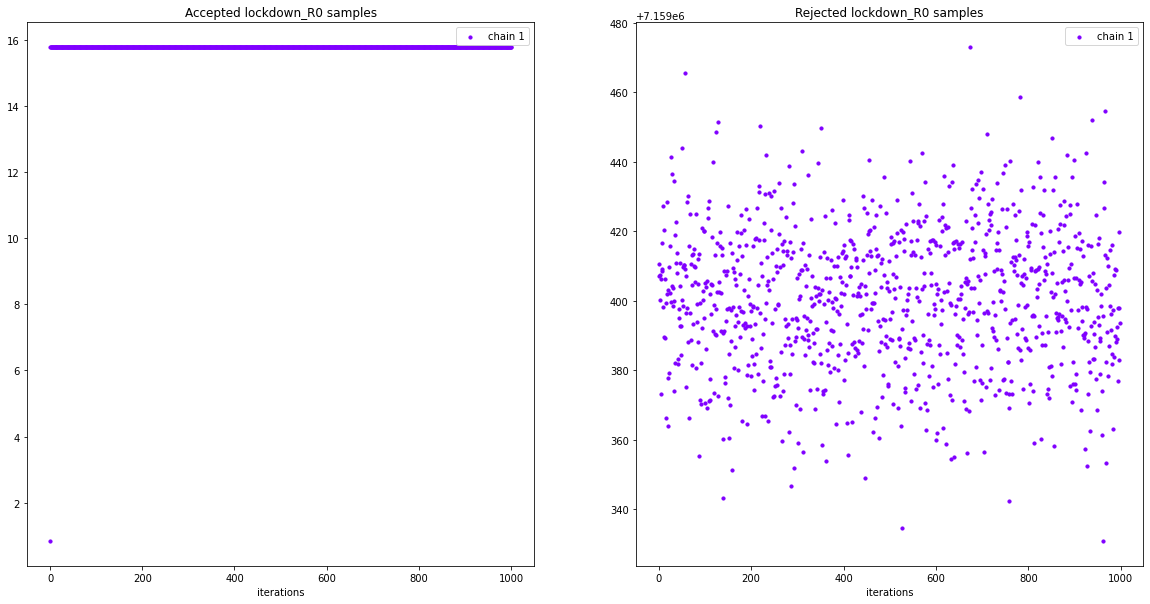

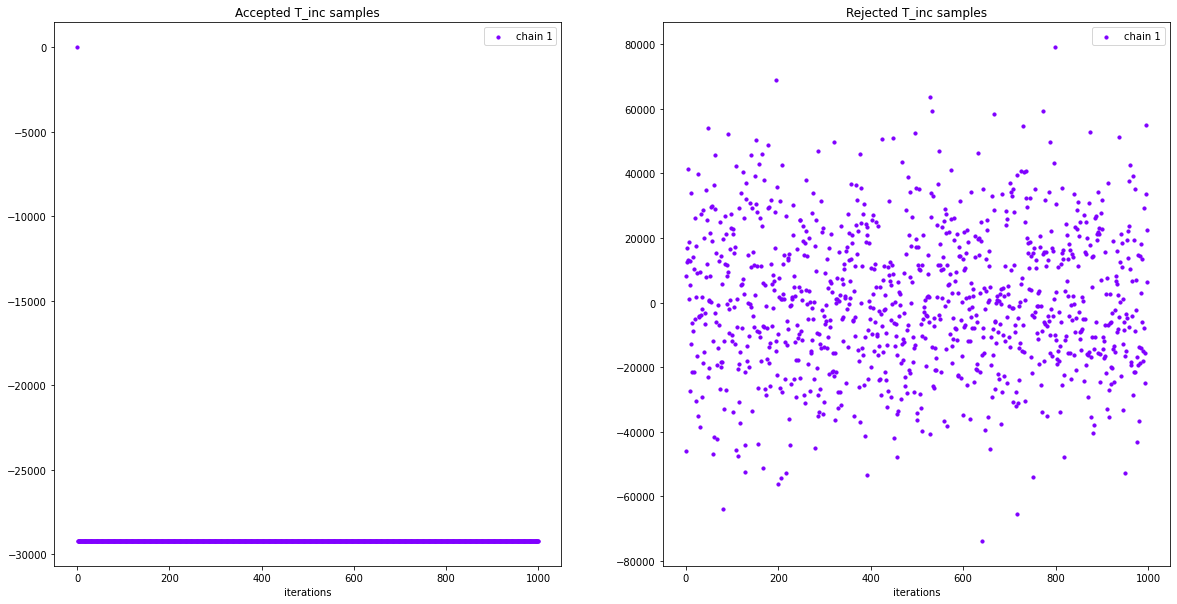

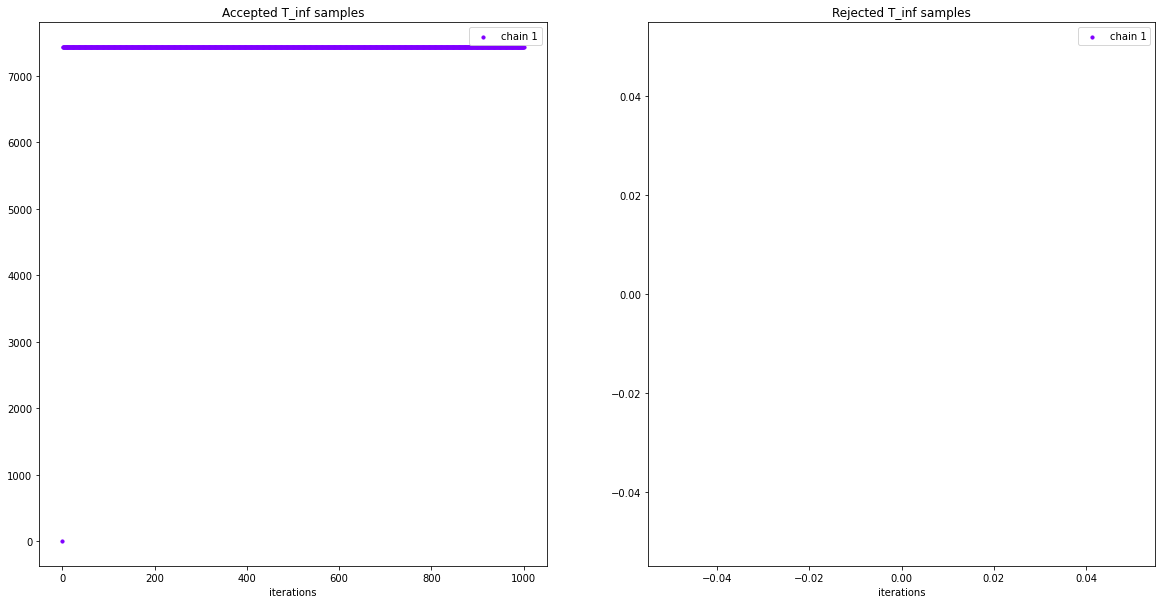

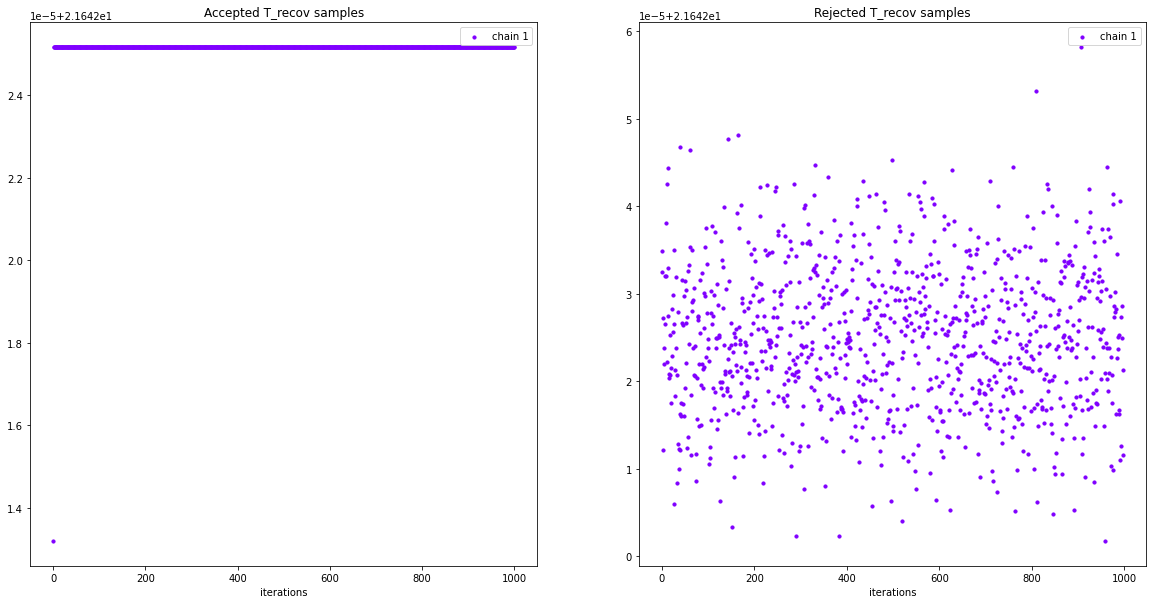

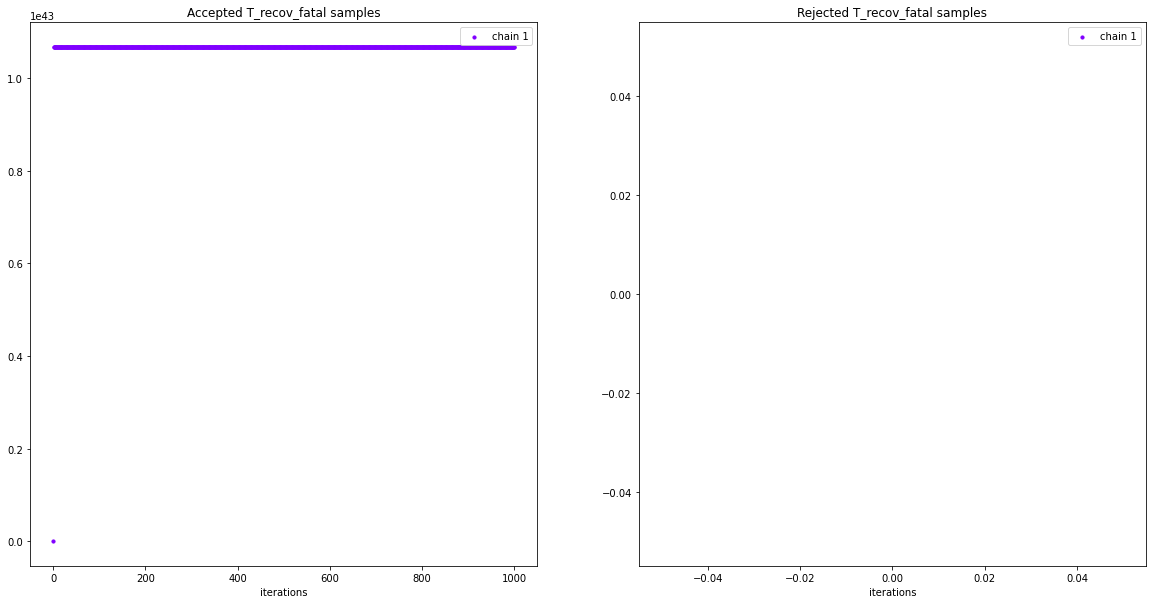

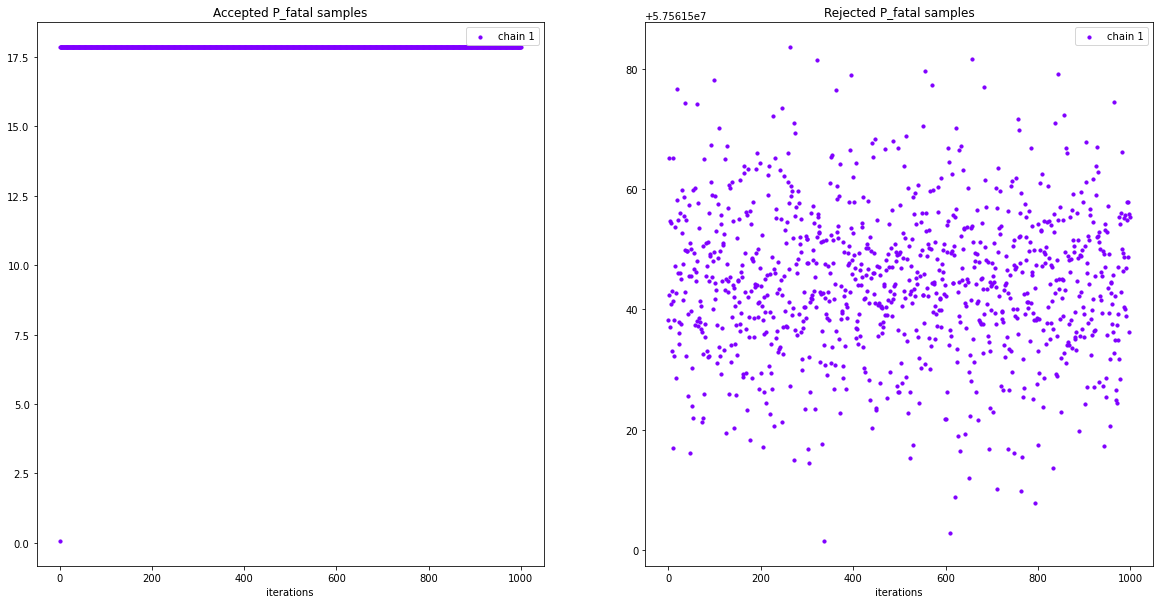

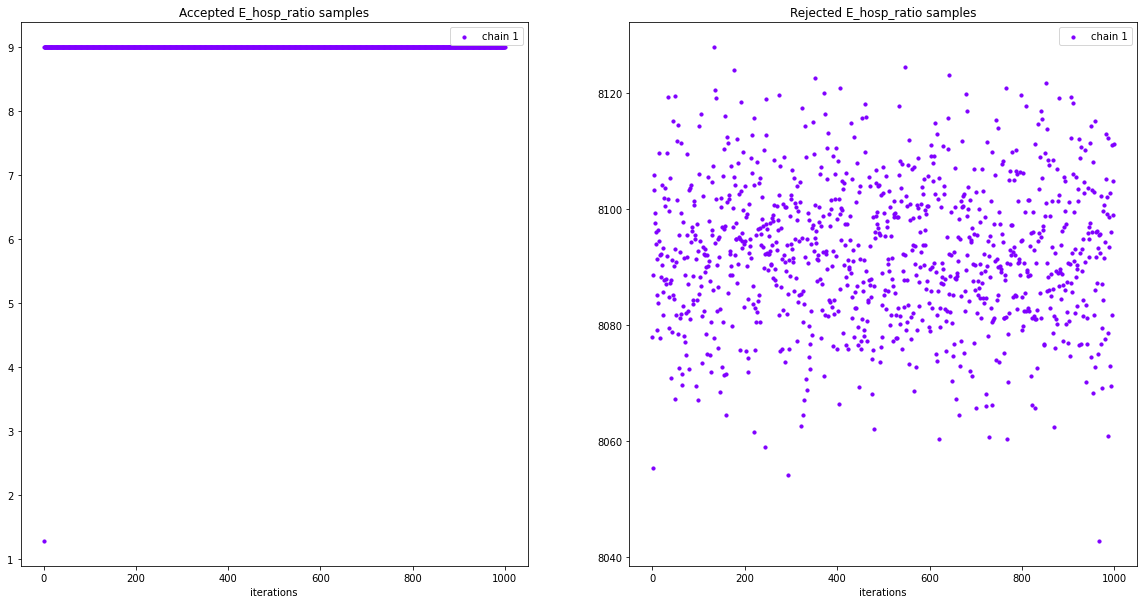

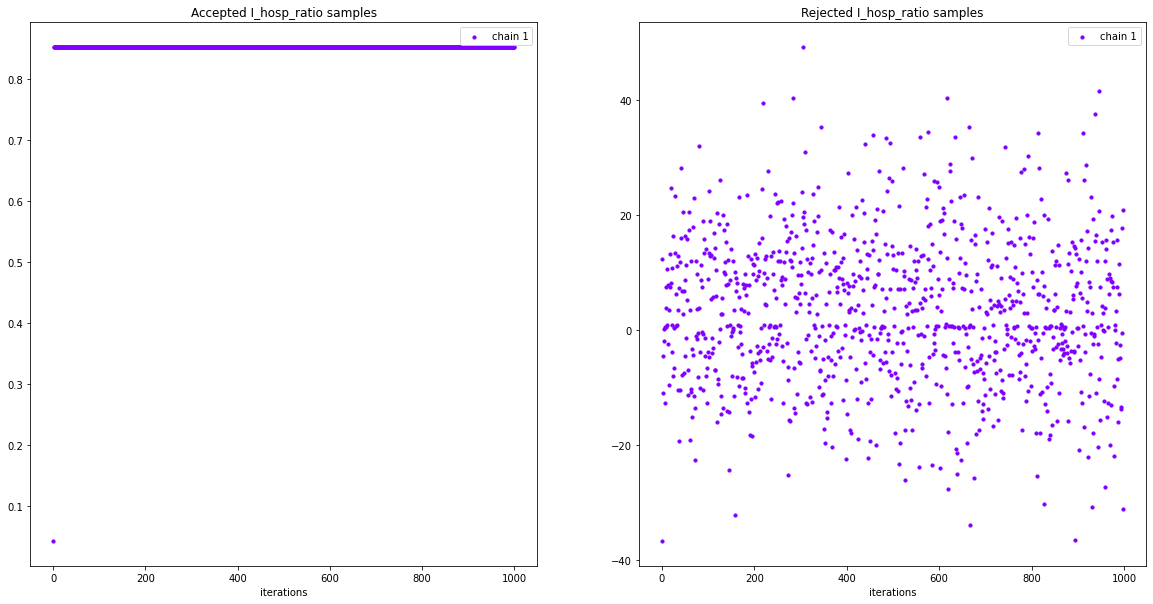

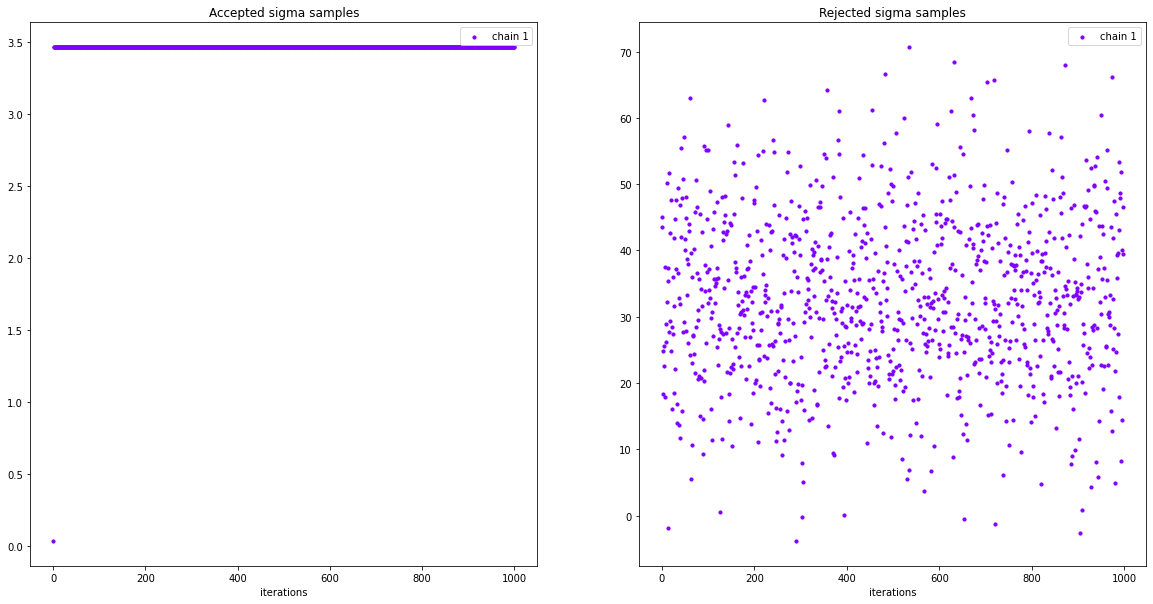

In [41]:
plot_chains(fit, out_dir)